<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/PCA_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip
   creating: DATA_PICTURE_3D_Change/
   creating: DATA_PICTURE_3D_Change/picture_alpha/
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_vo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
# import visualkeras
from sklearn.model_selection import train_test_split

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURE_3D_Change"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture_z = []
      matrix_picture_y = []
      matrix_picture_x = []
      for index in range(len(df)) :
        value_z = df.iloc[index , 2 ]
        matrix_picture_z.append(value_z)
        value_y = df.iloc[index , 1 ]
        matrix_picture_y.append(value_y)
        value_x = df.iloc[index , 0 ]
        matrix_picture_x.append(value_x)

      matrix_picture_z = np.array(matrix_picture_z).reshape(16,3)
      matrix_picture_y = np.array(matrix_picture_y).reshape(16,3)
      matrix_picture_x = np.array(matrix_picture_x).reshape(16,3)

      matrix_picture = {'x':matrix_picture_x , 'y':matrix_picture_y , 'z':matrix_picture_z }
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()



picture_alpha
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.063_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.096_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.078_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.086_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.07_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.063_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.076_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.048_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.057_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.08_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.013_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.013_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.042_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.

In [31]:
total_health_x_y_z , label_health = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      total_health_x_y_z.append(img)
      label_health.append(i)


In [32]:
x_health , y_health , z_health = [] , [] , []

# fig = plt.figure(figsize=(25 , 13 ))
# ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )

for i in total_health_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax0.legend()
  # ax0.grid()
  # plt.show()


  x_health.append(i['x'])
  y_health.append(i['y'])
  z_health.append(i['z'])

In [33]:
x_health = np.array(x_health).reshape(-1 , 16 , 3 , 1 )
y_health = np.array(y_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.array(z_health).reshape(-1 , 16 , 3 , 1 )

In [34]:
total_alpha_x_y_z , label_alpha = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_alpha' :
      total_alpha_x_y_z.append(img)
      label_alpha.append(i)


In [35]:
x_alpha , y_alpha , z_alpha = [] , [] , []

# fig = plt.figure(figsize=(25 , 13 ))
# ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )

for i in total_alpha_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax0.legend()
  # ax0.grid()
  # plt.show()

  x_alpha.append(i['x'])
  y_alpha.append(i['y'])
  z_alpha.append(i['z'])

x_alpha = np.array(x_alpha).reshape(-1 , 16 , 3 , 1 )
y_alpha = np.array(y_alpha).reshape(-1 , 16 , 3 , 1 )
z_alpha = np.array(z_alpha).reshape(-1 , 16 , 3 , 1 )

In [36]:
label_health = []
for i in range(len(z_health)):
  label_health.append([0])
label_health = np.array(label_health)

In [37]:
label_alpha = []
for i in range(len(z_alpha)):
  label_alpha.append([1])
label_alpha = np.array(label_alpha)

In [38]:
label_total = np.concat([label_health,label_alpha])

In [39]:
z_total = np.concat([z_health , z_alpha])


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# داده‌ها
X = torch.tensor(z_total, dtype=torch.float32)  # (792,16,3,1)
y = torch.tensor(label_total, dtype=torch.float32)  # (792,1)
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

z_dim = 32  # طول نویز برای Generator

# -------------------------
# Generator
# -------------------------
class Generator(nn.Module):
    def __init__(self, z_dim):
        super().__init__()
        self.label_emb = nn.Embedding(2, 8)  # 2 کلاس: واقعی/جعلی
        self.model = nn.Sequential(
            nn.Linear(z_dim + 8, 64),
            nn.ReLU(),
            nn.Linear(64, 16*3*1),
            nn.Tanh()  # مقیاس داده بین -1 و 1
        )

    def forward(self, z, labels):
        label_emb = self.label_emb(labels.long()).view(labels.size(0), -1)
        x = torch.cat([z, label_emb], dim=1)
        out = self.model(x)
        return out.view(-1,16,3,1)

# -------------------------
# Discriminator
# -------------------------
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.label_emb = nn.Embedding(2, 8)
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16*3*1 + 8, 64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        label_emb = self.label_emb(labels.long()).view(labels.size(0), -1)
        x = torch.cat([x.view(x.size(0), -1), label_emb], dim=1)
        return self.model(x)

# -------------------------
# مدل‌ها و optimizer
# -------------------------
G = Generator(z_dim).to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=0.0002)
optimizer_D = optim.Adam(D.parameters(), lr=0.0002)

# -------------------------
# آموزش GAN
# -------------------------
epochs = 50

for epoch in range(epochs):
    for xb, yb in loader:
        batch_size = xb.size(0)
        xb, yb = xb.to(device), yb.to(device)

        # -----------------
        # آموزش Discriminator
        # -----------------
        D.zero_grad()
        # واقعی
        real_labels = torch.ones(batch_size,1).to(device)
        out_real = D(xb, yb)
        loss_real = criterion(out_real, real_labels)

        # جعلی
        z = torch.randn(batch_size, z_dim).to(device)
        fake_imgs = G(z, yb)
        fake_labels = torch.zeros(batch_size,1).to(device)
        out_fake = D(fake_imgs.detach(), yb)
        loss_fake = criterion(out_fake, fake_labels)

        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()

        # -----------------
        # آموزش Generator
        # -----------------
        G.zero_grad()
        out_fake = D(fake_imgs, yb)
        loss_G = criterion(out_fake, real_labels)  # می‌خوای جعلی واقعی دیده شود
        loss_G.backward()
        optimizer_G.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}")

# -------------------------
# تست Discriminator
# -------------------------
with torch.no_grad():
    X_device = X.to(device)
    y_device = y.to(device)
    preds = D(X_device, y_device)
    predicted_labels = (preds >= 0.5).float()
    accuracy = (predicted_labels == y_device).float().mean()
    print(f"دقت Discriminator روی داده واقعی/جعلی: {accuracy.item()*100:.2f}%")


Epoch 1/50, Loss D: 1.1421, Loss G: 0.7242
Epoch 2/50, Loss D: 0.9858, Loss G: 0.7331
Epoch 3/50, Loss D: 0.8487, Loss G: 0.7604
Epoch 4/50, Loss D: 0.7371, Loss G: 0.8055
Epoch 5/50, Loss D: 0.6374, Loss G: 0.8831
Epoch 6/50, Loss D: 0.5273, Loss G: 1.0175
Epoch 7/50, Loss D: 0.4175, Loss G: 1.1994
Epoch 8/50, Loss D: 0.3469, Loss G: 1.3439
Epoch 9/50, Loss D: 0.2761, Loss G: 1.5374
Epoch 10/50, Loss D: 0.2020, Loss G: 1.8129
Epoch 11/50, Loss D: 0.1473, Loss G: 2.1192
Epoch 12/50, Loss D: 0.1146, Loss G: 2.3590
Epoch 13/50, Loss D: 0.0939, Loss G: 2.5683
Epoch 14/50, Loss D: 0.0749, Loss G: 2.8506
Epoch 15/50, Loss D: 0.0525, Loss G: 3.2514
Epoch 16/50, Loss D: 0.0423, Loss G: 3.4802
Epoch 17/50, Loss D: 0.0413, Loss G: 3.5050
Epoch 18/50, Loss D: 0.0371, Loss G: 3.6013
Epoch 19/50, Loss D: 0.0315, Loss G: 3.7728
Epoch 20/50, Loss D: 0.0262, Loss G: 3.9358
Epoch 21/50, Loss D: 0.0192, Loss G: 4.2962
Epoch 22/50, Loss D: 0.0133, Loss G: 4.7070
Epoch 23/50, Loss D: 0.0100, Loss G: 5.01

In [16]:
import torch

# نمونه‌ای از داده (اینجا نمونه شماره 0)
sample_data = z_total[0]        # شکل (16,3,1)
sample_label = label_total[0]   # شکل (1,)

# تبدیل به tensor و float32
sample_data = torch.tensor(sample_data, dtype=torch.float32).unsqueeze(0)  # شکل (1,16,3,1)
sample_label = torch.tensor(sample_label.squeeze(), dtype=torch.long).unsqueeze(0)  # شکل (1,)


In [17]:
D.eval()  # حالت ارزیابی
with torch.no_grad():
    sample_data = sample_data.to(device)
    sample_label = sample_label.to(device)
    validity = D(sample_data, sample_label)
    print("احتمال واقعی بودن داده:", validity.item())


احتمال واقعی بودن داده: 2.750283238128759e-05


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# داده‌ها
X = torch.tensor(z_total, dtype=torch.float32)  # (792,16,3,1)
y = torch.tensor(label_total, dtype=torch.float32)  # (792,1)

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# -------------------------
# شبکه Classifier
# -------------------------
class SimpleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16*3*1, 64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

# -------------------------
# مدل و optimizer
# -------------------------
model = SimpleClassifier().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -------------------------
# آموزش Classifier
# -------------------------
epochs = 50

for epoch in range(epochs):
    total_loss = 0
    for xb, yb in loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(loader):.4f}")

# -------------------------
# ارزیابی دقت
# -------------------------
with torch.no_grad():
    X_device = X.to(device)
    y_device = y.to(device)
    preds = model(X_device)
    predicted_labels = (preds >= 0.5).float()
    accuracy = (predicted_labels == y_device).float().mean()
    print(f"دقت Classifier: {accuracy.item()*100:.2f}%")


Epoch 1/50, Loss: 0.6968
Epoch 2/50, Loss: 0.6935
Epoch 3/50, Loss: 0.6939
Epoch 4/50, Loss: 0.6953
Epoch 5/50, Loss: 0.6950
Epoch 6/50, Loss: 0.6950
Epoch 7/50, Loss: 0.6931
Epoch 8/50, Loss: 0.6933
Epoch 9/50, Loss: 0.6941
Epoch 10/50, Loss: 0.6944
Epoch 11/50, Loss: 0.6941
Epoch 12/50, Loss: 0.6934
Epoch 13/50, Loss: 0.6938
Epoch 14/50, Loss: 0.6935
Epoch 15/50, Loss: 0.6945
Epoch 16/50, Loss: 0.6926
Epoch 17/50, Loss: 0.6937
Epoch 18/50, Loss: 0.6943
Epoch 19/50, Loss: 0.6940
Epoch 20/50, Loss: 0.6937
Epoch 21/50, Loss: 0.6932
Epoch 22/50, Loss: 0.6936
Epoch 23/50, Loss: 0.6934
Epoch 24/50, Loss: 0.6936
Epoch 25/50, Loss: 0.6935
Epoch 26/50, Loss: 0.6949
Epoch 27/50, Loss: 0.6934
Epoch 28/50, Loss: 0.6936
Epoch 29/50, Loss: 0.6927
Epoch 30/50, Loss: 0.6936
Epoch 31/50, Loss: 0.6931
Epoch 32/50, Loss: 0.6928
Epoch 33/50, Loss: 0.6941
Epoch 34/50, Loss: 0.6956
Epoch 35/50, Loss: 0.6930
Epoch 36/50, Loss: 0.6931
Epoch 37/50, Loss: 0.6933
Epoch 38/50, Loss: 0.6925
Epoch 39/50, Loss: 0.

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# داده‌ها
X = torch.tensor(z_total, dtype=torch.float32).to(device)   # (792,16,3,1)
y = torch.tensor(label_total, dtype=torch.float32).to(device)

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

latent_dim = 16  # ابعاد latent space

# -------------------------
# Autoencoder (Feature Extractor)
# -------------------------
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(16*3*1, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 16*3*1),
            nn.Tanh()
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        out = out.view(x.size(0), 16, 3, 1)  # 🔹 اصلاح ابعاد
        return out, z

# -------------------------
# Conditional GAN
# -------------------------
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.label_emb = nn.Embedding(2, 8)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + 8, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim),
            nn.ReLU()
        )
    def forward(self, z, labels):
        label_emb = self.label_emb(labels.long()).view(labels.size(0), -1)
        x = torch.cat([z, label_emb], dim=1)
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.label_emb = nn.Embedding(2, 8)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + 8, 64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1),
            nn.Sigmoid()
        )
    def forward(self, z, labels):
        label_emb = self.label_emb(labels.long()).view(labels.size(0), -1)
        x = torch.cat([z, label_emb], dim=1)
        return self.model(x)

# -------------------------
# مدل‌ها و optimizer
# -------------------------
AE = Autoencoder().to(device)
G = Generator(latent_dim).to(device)
D = Discriminator(latent_dim).to(device)

criterion = nn.BCELoss()
optimizer_AE = optim.Adam(AE.parameters(), lr=0.001)
optimizer_G = optim.Adam(G.parameters(), lr=0.0002)
optimizer_D = optim.Adam(D.parameters(), lr=0.0002)

# -------------------------
# آموزش Autoencoder
# -------------------------
epochs_ae = 50
for epoch in range(epochs_ae):
    total_loss = 0
    for xb, _ in loader:
        xb = xb.to(device)
        optimizer_AE.zero_grad()
        out, _ = AE(xb)
        loss = nn.MSELoss()(out, xb)  # ابعاد مطابقت دارند
        loss.backward()
        optimizer_AE.step()
        total_loss += loss.item()
    print(f"AE Epoch {epoch+1}/{epochs_ae}, Loss: {total_loss/len(loader):.4f}")

# -------------------------
# آموزش GAN روی latent features
# -------------------------
epochs_gan = 100
for epoch in range(epochs_gan):
    for xb, yb in loader:
        batch_size = xb.size(0)
        xb, yb = xb.to(device), yb.to(device)

        # استخراج ویژگی latent
        with torch.no_grad():
            _, z_real = AE(xb)

        # -----------------
        # Discriminator
        # -----------------
        D.zero_grad()
        real_labels = torch.ones(batch_size,1).to(device)
        fake_labels = torch.zeros(batch_size,1).to(device)

        out_real = D(z_real, yb)
        loss_real = criterion(out_real, real_labels)

        z_fake = G(torch.randn(batch_size, latent_dim).to(device), yb)
        out_fake = D(z_fake.detach(), yb)
        loss_fake = criterion(out_fake, fake_labels)

        loss_D = loss_real + loss_fake
        loss_D.backward()
        optimizer_D.step()

        # -----------------
        # Generator
        # -----------------
        G.zero_grad()
        z_fake = G(torch.randn(batch_size, latent_dim).to(device), yb)
        out_fake = D(z_fake, yb)
        loss_G = criterion(out_fake, real_labels)
        loss_G.backward()
        optimizer_G.step()

    print(f"GAN Epoch {epoch+1}/{epochs_gan}, Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}")

# -------------------------
# تست Discriminator روی latent features
# -------------------------
with torch.no_grad():
    _, z_all = AE(X)
    preds = D(z_all, y)
    predicted_labels = (preds >= 0.5).float()
    accuracy = (predicted_labels == y).float().mean()
    print(f"دقت نهایی Discriminator روی latent: {accuracy.item()*100:.2f}%")


AE Epoch 1/50, Loss: 3.3649
AE Epoch 2/50, Loss: 2.2937
AE Epoch 3/50, Loss: 2.2670
AE Epoch 4/50, Loss: 2.2633
AE Epoch 5/50, Loss: 2.2628
AE Epoch 6/50, Loss: 2.2626
AE Epoch 7/50, Loss: 2.2626
AE Epoch 8/50, Loss: 2.2626
AE Epoch 9/50, Loss: 2.2625
AE Epoch 10/50, Loss: 2.2625
AE Epoch 11/50, Loss: 2.2625
AE Epoch 12/50, Loss: 2.2626
AE Epoch 13/50, Loss: 2.2625
AE Epoch 14/50, Loss: 2.2623
AE Epoch 15/50, Loss: 2.2627
AE Epoch 16/50, Loss: 2.2628
AE Epoch 17/50, Loss: 2.2627
AE Epoch 18/50, Loss: 2.2626
AE Epoch 19/50, Loss: 2.2623
AE Epoch 20/50, Loss: 2.2624
AE Epoch 21/50, Loss: 2.2625
AE Epoch 22/50, Loss: 2.2624
AE Epoch 23/50, Loss: 2.2624
AE Epoch 24/50, Loss: 2.2624
AE Epoch 25/50, Loss: 2.2625
AE Epoch 26/50, Loss: 2.2624
AE Epoch 27/50, Loss: 2.2625
AE Epoch 28/50, Loss: 2.2626
AE Epoch 29/50, Loss: 2.2625
AE Epoch 30/50, Loss: 2.2623
AE Epoch 31/50, Loss: 2.2626
AE Epoch 32/50, Loss: 2.2625
AE Epoch 33/50, Loss: 2.2627
AE Epoch 34/50, Loss: 2.2625
AE Epoch 35/50, Loss: 2

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# داده‌ها
X = torch.tensor(z_total, dtype=torch.float32).to(device)   # (792,16,3,1)
y = torch.tensor(label_total, dtype=torch.float32).to(device)
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

latent_dim = 16

# -------------------------
# Convolutional Autoencoder
# -------------------------
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1),  # (1,16,3) -> (8,16,3)
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(8*16*3, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 8*16*3),
            nn.ReLU(),
            nn.Unflatten(1, (8,16,3)),
            nn.ConvTranspose2d(8,1,kernel_size=3,stride=1,padding=1),
            nn.Tanh()
        )
    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out, z

# -------------------------
# WGAN-GP Generator & Discriminator
# -------------------------
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.label_emb = nn.Embedding(2,8)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + 8, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim),
            nn.ReLU()
        )
    def forward(self, z, labels):
        label_emb = self.label_emb(labels.long()).view(labels.size(0), -1)
        x = torch.cat([z, label_emb], dim=1)
        return self.model(x)

class Discriminator(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.label_emb = nn.Embedding(2,8)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + 8,64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1)
        )
    def forward(self, z, labels):
        label_emb = self.label_emb(labels.long()).view(labels.size(0), -1)
        x = torch.cat([z, label_emb], dim=1)
        return self.model(x)

# -------------------------
# مدل‌ها و optimizer
# -------------------------
AE = ConvAutoencoder().to(device)
G = Generator(latent_dim).to(device)
D = Discriminator(latent_dim).to(device)

optimizer_AE = optim.Adam(AE.parameters(), lr=0.001)
optimizer_G = optim.Adam(G.parameters(), lr=0.0002)
optimizer_D = optim.Adam(D.parameters(), lr=0.0002)

# -------------------------
# آموزش Autoencoder
# -------------------------
epochs_ae = 50
for epoch in range(epochs_ae):
    total_loss = 0
    for xb, _ in loader:
        xb = xb.to(device)
        xb = xb.permute(0,3,1,2)  # (batch,H,W,C) -> (batch,C,H,W)
        optimizer_AE.zero_grad()
        out, _ = AE(xb)
        loss = nn.MSELoss()(out, xb)
        loss.backward()
        optimizer_AE.step()
        total_loss += loss.item()
    print(f"AE Epoch {epoch+1}/{epochs_ae}, Loss: {total_loss/len(loader):.4f}")

# -------------------------
# WGAN-GP Helper
# -------------------------
def gradient_penalty(D, real, fake, labels):
    alpha = torch.rand(real.size(0),1).to(device)
    interpolates = (alpha*real + (1-alpha)*fake).requires_grad_(True)
    d_interpolates = D(interpolates, labels)
    grads = torch.autograd.grad(outputs=d_interpolates, inputs=interpolates,
                                grad_outputs=torch.ones_like(d_interpolates),
                                create_graph=True, retain_graph=True, only_inputs=True)[0]
    grads = grads.view(grads.size(0), -1)
    gp = ((grads.norm(2, dim=1) - 1)**2).mean()
    return gp

# -------------------------
# آموزش WGAN-GP روی latent
# -------------------------
lambda_gp = 10
n_critic = 5
epochs_gan = 100

for epoch in range(epochs_gan):
    for i, (xb, yb) in enumerate(loader):
        xb, yb = xb.to(device), yb.to(device)
        xb = xb.permute(0,3,1,2)  # reshape به (batch, C, H, W)
        batch_size = xb.size(0)

        with torch.no_grad():
            _, z_real = AE(xb)

        # -----------------
        # Discriminator
        # -----------------
        for _ in range(n_critic):
            D.zero_grad()
            z_fake = G(torch.randn(batch_size, latent_dim).to(device), yb)
            d_real = D(z_real, yb)
            d_fake = D(z_fake.detach(), yb)
            gp = gradient_penalty(D, z_real, z_fake.detach(), yb)
            loss_D = -(torch.mean(d_real) - torch.mean(d_fake)) + lambda_gp * gp
            loss_D.backward()
            optimizer_D.step()

        # -----------------
        # Generator
        # -----------------
        G.zero_grad()
        z_fake = G(torch.randn(batch_size, latent_dim).to(device), yb)
        loss_G = -torch.mean(D(z_fake, yb))
        loss_G.backward()
        optimizer_G.step()

    print(f"WGAN Epoch {epoch+1}/{epochs_gan}, Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}")

# -------------------------
# تست روی latent
# -------------------------
with torch.no_grad():
    X_reshaped = X.permute(0,3,1,2)  # reshape برای AE
    _, z_all = AE(X_reshaped)
    preds = torch.sigmoid(D(z_all, y))  # تبدیل به probability
    predicted_labels = (preds >= 0.5).float()
    accuracy = (predicted_labels == y).float().mean()
    print(f"دقت نهایی Discriminator روی latent: {accuracy.item()*100:.2f}%")


AE Epoch 1/50, Loss: 3.6907
AE Epoch 2/50, Loss: 2.3143
AE Epoch 3/50, Loss: 2.2732
AE Epoch 4/50, Loss: 2.2706
AE Epoch 5/50, Loss: 2.2705
AE Epoch 6/50, Loss: 2.2702
AE Epoch 7/50, Loss: 2.2699
AE Epoch 8/50, Loss: 2.2675
AE Epoch 9/50, Loss: 2.2631
AE Epoch 10/50, Loss: 2.2629
AE Epoch 11/50, Loss: 2.2626
AE Epoch 12/50, Loss: 2.2627
AE Epoch 13/50, Loss: 2.2626
AE Epoch 14/50, Loss: 2.2625
AE Epoch 15/50, Loss: 2.2626
AE Epoch 16/50, Loss: 2.2625
AE Epoch 17/50, Loss: 2.2625
AE Epoch 18/50, Loss: 2.2625
AE Epoch 19/50, Loss: 2.2625
AE Epoch 20/50, Loss: 2.2627
AE Epoch 21/50, Loss: 2.2625
AE Epoch 22/50, Loss: 2.2627
AE Epoch 23/50, Loss: 2.2623
AE Epoch 24/50, Loss: 2.2625
AE Epoch 25/50, Loss: 2.2624
AE Epoch 26/50, Loss: 2.2623
AE Epoch 27/50, Loss: 2.2626
AE Epoch 28/50, Loss: 2.2624
AE Epoch 29/50, Loss: 2.2624
AE Epoch 30/50, Loss: 2.2621
AE Epoch 31/50, Loss: 2.2622
AE Epoch 32/50, Loss: 2.2625
AE Epoch 33/50, Loss: 2.2626
AE Epoch 34/50, Loss: 2.2624
AE Epoch 35/50, Loss: 2

ابعاد قبل: (300, 3)
ابعاد بعد از PCA: (300, 2)
دقت مدل: 0.7444444444444445


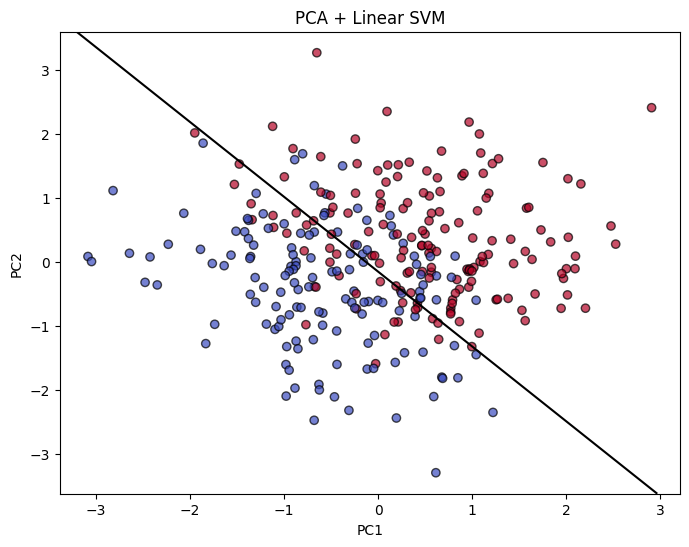

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ==============================
#  شبیه‌سازی داده سه‌بعدی
# ==============================
# فرض: داده‌هات (N,3) و لیبل‌ها (N,)
np.random.seed(42)
N = 300
X = np.random.randn(N, 3)  # داده سه‌بعدی (X, Y, Z)
y = (X[:, 2] + 0.5*X[:, 0] > 0).astype(int)  # لیبل مصنوعی بر اساس Z و X

# ==============================
#  کاهش بعد با PCA
# ==============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("ابعاد قبل:", X.shape)
print("ابعاد بعد از PCA:", X_pca.shape)

# ==============================
#  دسته‌بندی با SVM
# ==============================
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("دقت مدل:", acc)

# ==============================
#  رسم داده‌ها و مرز دسته‌بندی
# ==============================
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", edgecolors="k", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA + Linear SVM")

# رسم خط مرزی
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors="k", levels=[0], linestyles=["-"])
plt.show()


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# =========================
# آماده‌سازی داده‌ها
# =========================
# فرض: z_total شکل (N, 16, 3, 1) دارد و label_total شکل (N, 1)
X = torch.tensor(z_total, dtype=torch.float32)  # تصاویر
y = torch.tensor(label_total, dtype=torch.long).squeeze()  # لیبل‌ها (0 یا 1)

# تقسیم داده‌ها
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# تعریف Autoencoder
# =========================
class Encoder(nn.Module):
    def __init__(self, latent_dim=32):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv1d(3, 16, kernel_size=3, padding=1), # (B,3,16)
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, padding=1), # (B,32,16)
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(32*16, latent_dim)
        )
    def forward(self, x):
        # ورودی: (B,16,3,1) -> reshape به (B,3,16)
        x = x.squeeze(-1).permute(0,2,1)
        return self.encoder(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim=32):
        super(Decoder, self).__init__()
        self.decoder_fc = nn.Linear(latent_dim, 32*16)
        self.decoder_conv = nn.Sequential(
            nn.Conv1d(32, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(16, 3, kernel_size=3, padding=1),
            nn.Sigmoid()
        )
    def forward(self, z):
        x = self.decoder_fc(z)
        x = x.view(-1, 32, 16)
        x = self.decoder_conv(x)
        return x.permute(0,2,1).unsqueeze(-1) # بازسازی (B,16,3,1)

class Autoencoder(nn.Module):
    def __init__(self, latent_dim=32):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)
    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out, z

# =========================
# تعریف Classifier
# =========================
class Classifier(nn.Module):
    def __init__(self, latent_dim=32, num_classes=2):
        super(Classifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    def forward(self, z):
        return self.fc(z)

# =========================
# آموزش
# =========================
device = "cuda" if torch.cuda.is_available() else "cpu"
latent_dim = 32
AE = Autoencoder(latent_dim).to(device)
clf = Classifier(latent_dim).to(device)

opt_ae = optim.Adam(AE.parameters(), lr=1e-3)
opt_clf = optim.Adam(clf.parameters(), lr=1e-3)

criterion_recon = nn.MSELoss()
criterion_cls = nn.CrossEntropyLoss()

# DataLoader
train_data = torch.utils.data.TensorDataset(X_train, y_train)
test_data = torch.utils.data.TensorDataset(X_test, y_test)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

# مرحله 1: آموزش Autoencoder
print("=== مرحله 1: آموزش Autoencoder ===")
for epoch in range(10):  # می‌تونی تعداد رو بیشتر بذاری
    AE.train()
    losses = []
    for xb, _ in train_loader:
        xb = xb.to(device)
        opt_ae.zero_grad()
        out, _ = AE(xb)
        loss = criterion_recon(out, xb)
        loss.backward()
        opt_ae.step()
        losses.append(loss.item())
    print(f"Epoch {epoch+1}, Loss={np.mean(losses):.4f}")

# مرحله 2: آموزش Classifier روی latent
print("\n=== مرحله 2: آموزش Classifier ===")
for epoch in range(20):
    AE.eval()
    clf.train()
    losses = []
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        with torch.no_grad():
            _, z = AE(xb)
        opt_clf.zero_grad()
        out = clf(z)
        loss = criterion_cls(out, yb)
        loss.backward()
        opt_clf.step()
        losses.append(loss.item())
    print(f"Epoch {epoch+1}, Loss={np.mean(losses):.4f}")

# مرحله 3: تست
AE.eval()
clf.eval()
Z_test = []
y_true = []
y_pred = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        _, z = AE(xb)
        out = clf(z)
        preds = torch.argmax(out, dim=1)
        Z_test.append(z.cpu())
        y_true.append(yb.cpu())
        y_pred.append(preds.cpu())

y_true = torch.cat(y_true)
y_pred = torch.cat(y_pred)
acc = accuracy_score(y_true, y_pred)
print("\n🎯 دقت نهایی مدل:", acc)


=== مرحله 1: آموزش Autoencoder ===
Epoch 1, Loss=2.9821
Epoch 2, Loss=2.2780
Epoch 3, Loss=2.2679
Epoch 4, Loss=2.2670
Epoch 5, Loss=2.2648
Epoch 6, Loss=2.2647
Epoch 7, Loss=2.2647
Epoch 8, Loss=2.2645
Epoch 9, Loss=2.2643
Epoch 10, Loss=2.2642

=== مرحله 2: آموزش Classifier ===
Epoch 1, Loss=1.0536
Epoch 2, Loss=0.7202
Epoch 3, Loss=0.6973
Epoch 4, Loss=0.6996
Epoch 5, Loss=0.6958
Epoch 6, Loss=0.6972
Epoch 7, Loss=0.6964
Epoch 8, Loss=0.7042
Epoch 9, Loss=0.6972
Epoch 10, Loss=0.6988
Epoch 11, Loss=0.7062
Epoch 12, Loss=0.6985
Epoch 13, Loss=0.6994
Epoch 14, Loss=0.7010
Epoch 15, Loss=0.6979
Epoch 16, Loss=0.6982
Epoch 17, Loss=0.6958
Epoch 18, Loss=0.7000
Epoch 19, Loss=0.6945
Epoch 20, Loss=0.6958

🎯 دقت نهایی مدل: 0.5031446540880503


In [103]:
z_total_1 = z_total[:300]

In [104]:
z_total_1.shape

(300, 16, 3, 1)

In [105]:
z_2 = z_total[500:]

In [106]:
x_test = z_2.reshape(len(z_2) , -1 )

In [107]:
import numpy as np
from sklearn.decomposition import PCA

# فرض: z_total شکل (N,16,3,1) و label_total شکل (N,1) دارد
X = z_total_1.reshape(len(z_total_1), -1)  # (N,48)
# y = label_total.squeeze()

# جدا کردن train (سالم‌ها = 0)
# X_train = X[y == 0]
X_train = X
# fit فقط روی سالم‌ها
pca = PCA(n_components=3)
pca.fit(X_train)

# حالا می‌تونی روی کل دیتا transform بزنی
X_pca = pca.transform(X)

print("ابعاد داده اصلی:", X.shape)
print("ابعاد بعد از PCA:", X_pca.shape)  # (N,2)


ابعاد داده اصلی: (300, 48)
ابعاد بعد از PCA: (300, 3)


In [108]:
X.shape

(300, 48)

In [109]:
X_pca.shape

(300, 3)

In [110]:
x_test_pca = pca.transform(x_test)

/tmp/ipython-input-3193749293.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/tmp/ipython-input-3193749293.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


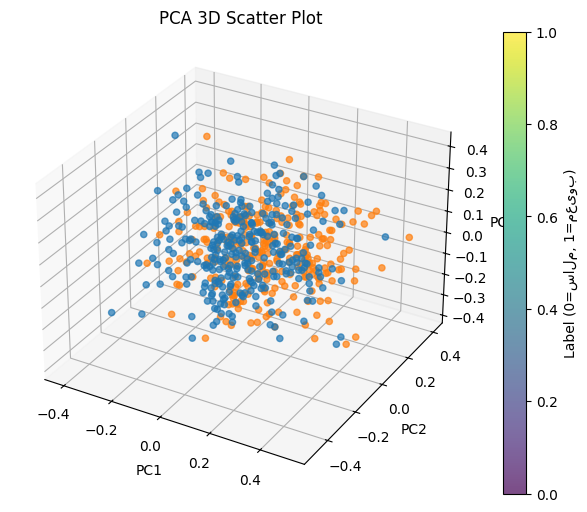

In [111]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# فرض کنیم خروجی PCA داری:
# X_pca شکل (N,3) → 3 بعدی
# y شکل (N,) → لیبل‌ها (0 یا 1)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# ترسیم
scatter = ax.scatter(
    X_pca[:,0], X_pca[:,1], X_pca[:,2]
    , cmap="coolwarm", alpha=0.7
)
scatter = ax.scatter(
    x_test_pca[:,0], x_test_pca[:,1], x_test_pca[:,2]
    , cmap="red", alpha=0.7
)

# برچسب محور‌ها
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3D Scatter Plot")

# نوار رنگی
plt.colorbar(scatter, label="Label (0=سالم, 1=معیوب)")
plt.show()


In [114]:
y_total = [0 for i in range(len(X_pca))]

In [115]:
for i in range(len(x_test_pca)):
  y_total.append(1)


In [116]:
total_x = np.concat([X_pca , x_test_pca ])

In [117]:
total_x.shape

(592, 3)

In [118]:
len(y_total)

592

In [119]:
# from sklearn.svm import SVC

# clf = SVC(kernel='rbf')
# clf.fit(total_x, y_total)

# y_pred = clf.predict(total_x)
# acc = accuracy_score(y_total, y_pred)
# print("دقت SVM روی داده تست:", acc)


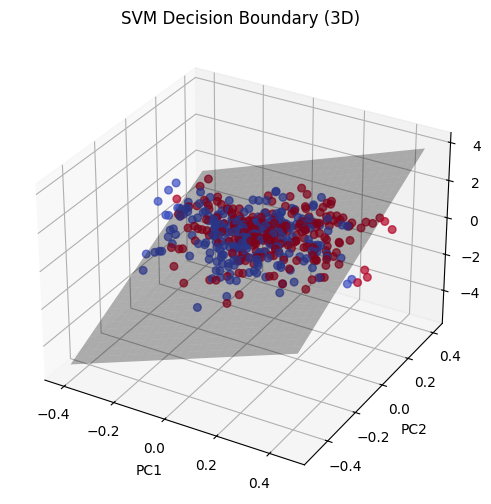

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# فرض: X_pca (N,3) و y (N,) داری
X_train, X_test, y_train, y_test = train_test_split(total_x, y_total, test_size=0.2, random_state=42, stratify=y_total)

# آموزش SVM
clf = SVC(kernel='linear')  # خطی تا صفحه بتونیم رسم کنیم
clf.fit(X_train, y_train)

# scatter داده‌ها
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=y_train, cmap="coolwarm", s=30, alpha=0.7)

# گرفتن ضرایب برای مرز تصمیم
w = clf.coef_[0]
b = clf.intercept_[0]

# تعریف شبکه روی محورهای اول و دوم
xx, yy = np.meshgrid(
    np.linspace(X_train[:,0].min(), X_train[:,0].max(), 30),
    np.linspace(X_train[:,1].min(), X_train[:,1].max(), 30)
)

# محاسبه z برای صفحه: w0*x + w1*y + w2*z + b = 0
zz = -(w[0]*xx + w[1]*yy + b) / w[2]

# رسم صفحه مرزی
ax.plot_surface(xx, yy, zz, color='k', alpha=0.3)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("SVM Decision Boundary (3D)")
plt.show()


In [121]:
# clf = SVC(kernel='linear')  # خطی تا صفحه بتونیم رسم کنیم
y_pre = clf.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score

In [123]:
acc = accuracy_score(y_pre , y_test )

In [124]:
acc

0.6134453781512605